Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

In [200]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [201]:
df=pd.read_excel("C:/Users/anamk/Downloads/compactiv.xlsx")

In [204]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [205]:
df.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [206]:
df.shape

(8192, 22)

In [207]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [208]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [210]:
#imputing null values
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)       
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [211]:

for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

RUNQSZ :  2
CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64




In [212]:
df= pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  pgscan                8192 non-null   float64
 13  atch                  8192 non-null   float64
 14  pgin                  8192 non-null   float64
 15  ppgin                

In [214]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    if df[column].dtype != 'object':
        sns.distplot(df[column], kde=True, color='g')
    plt.subplot(2,2,2)
    if df[column].dtype != 'object':
        ax = sns.boxplot(x=df[column])
    plt.show()

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


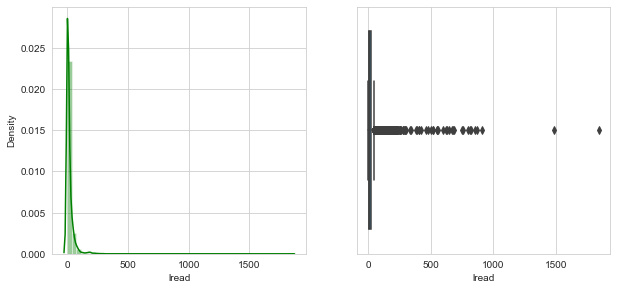

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


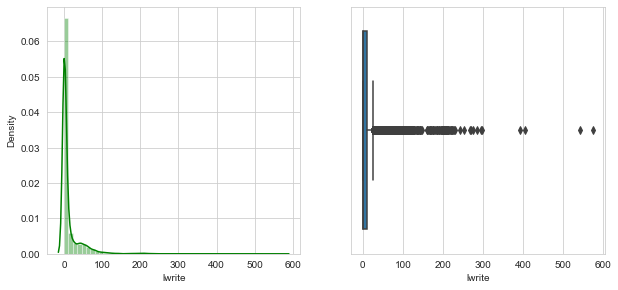

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


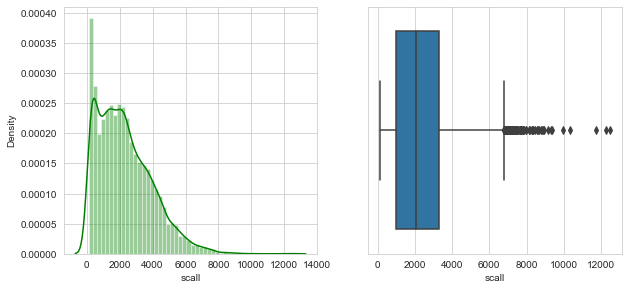

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


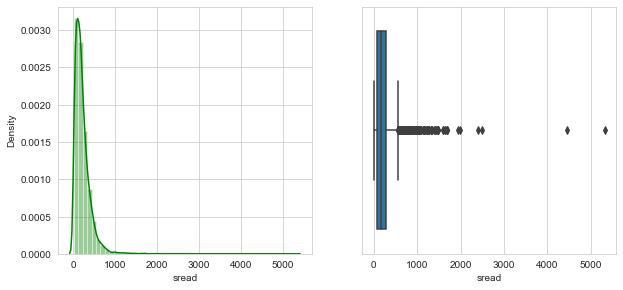

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


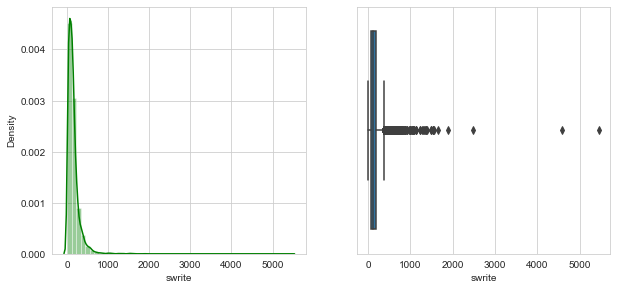

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


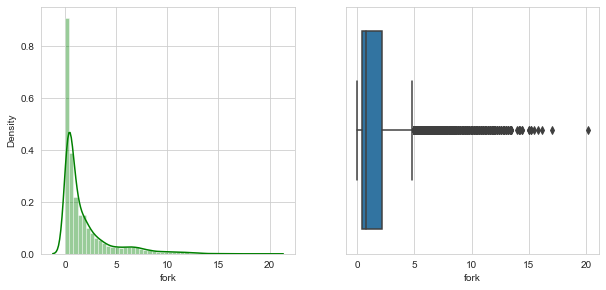

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


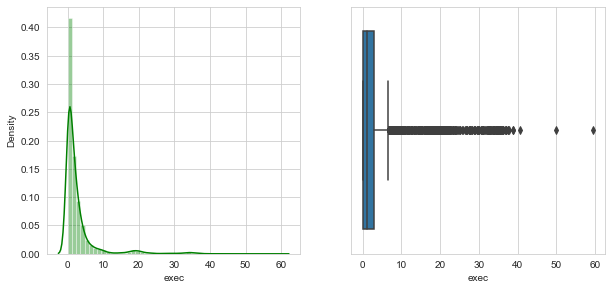

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


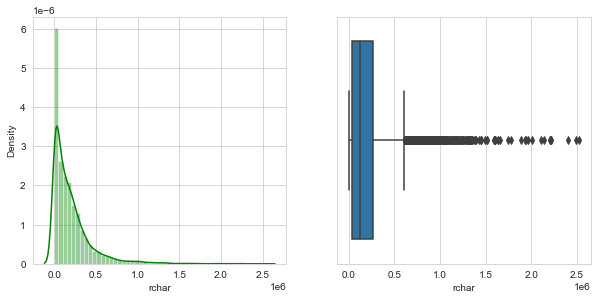

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


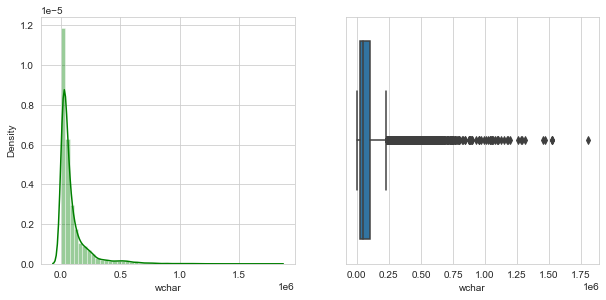

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


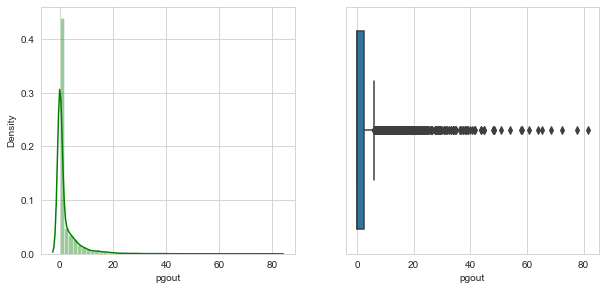

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


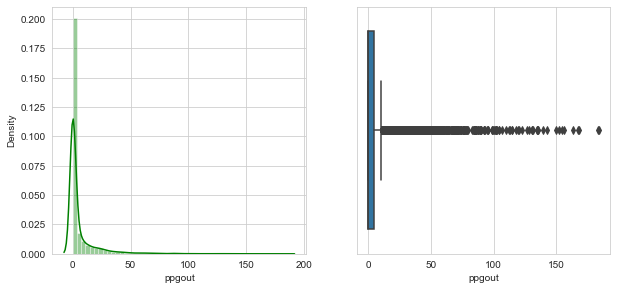

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


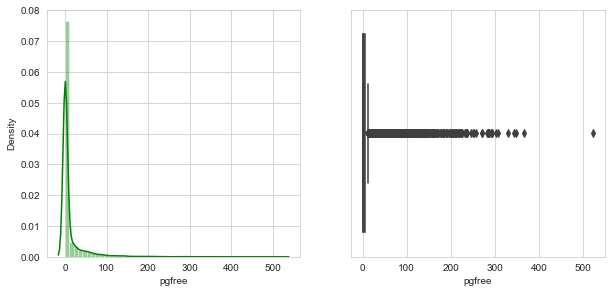

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


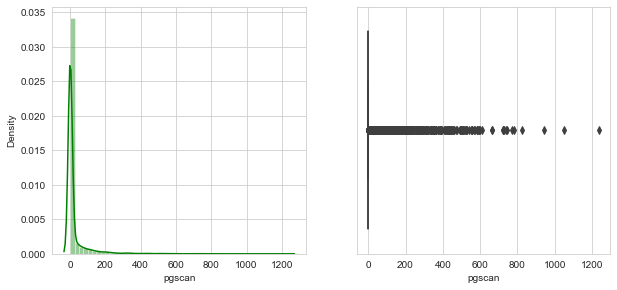

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


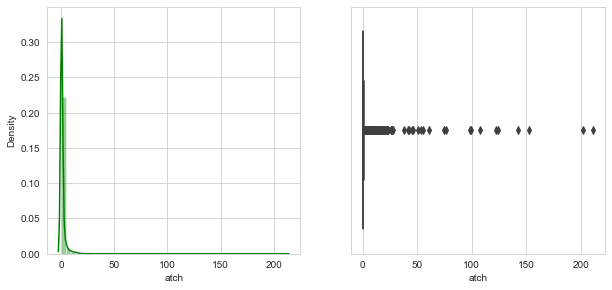

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


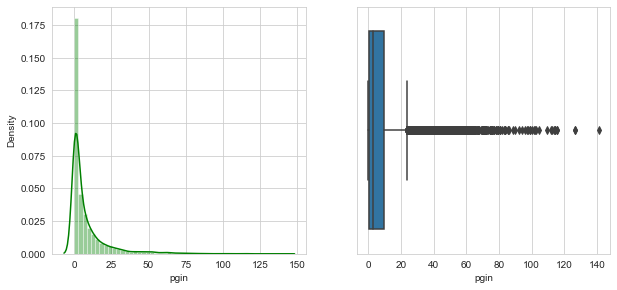

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


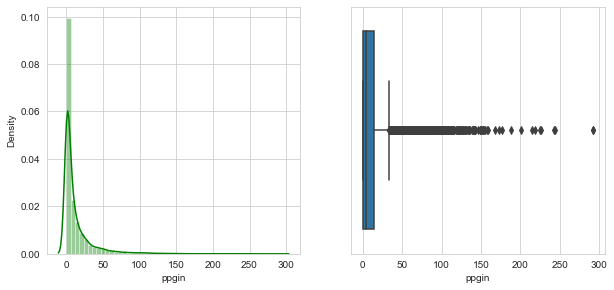

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


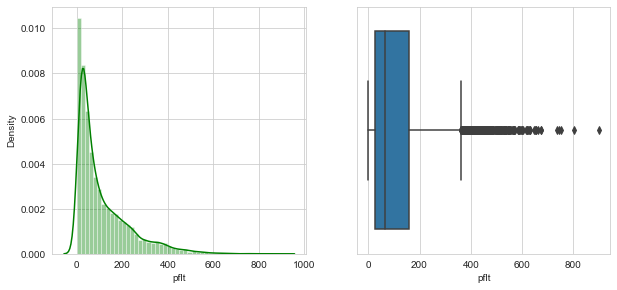

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


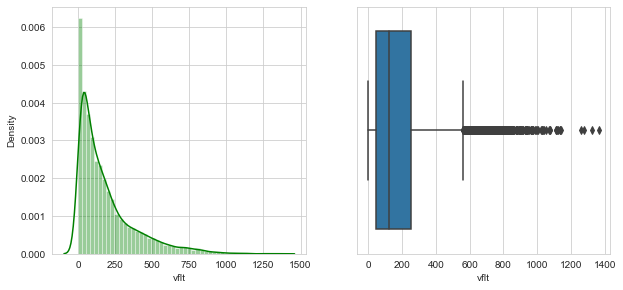

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


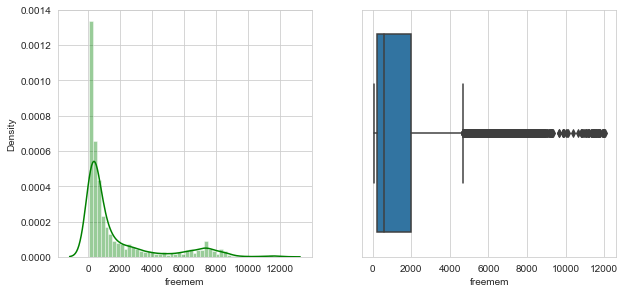

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


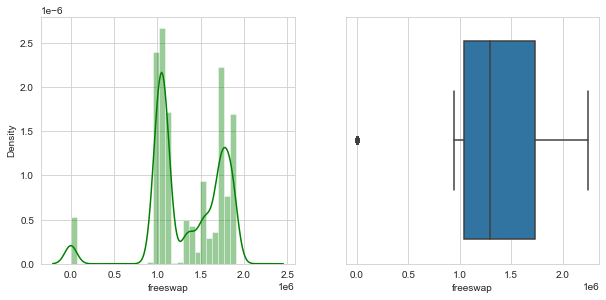

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


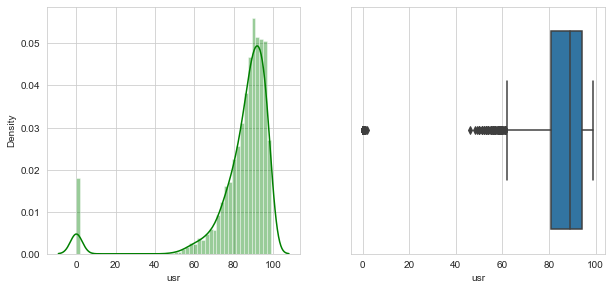

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


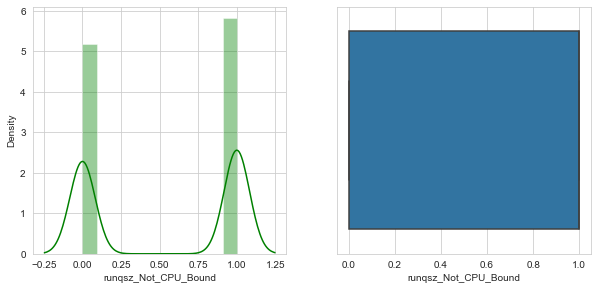

In [215]:
for i in df.columns:
        univariateAnalysis_numeric(i,5)

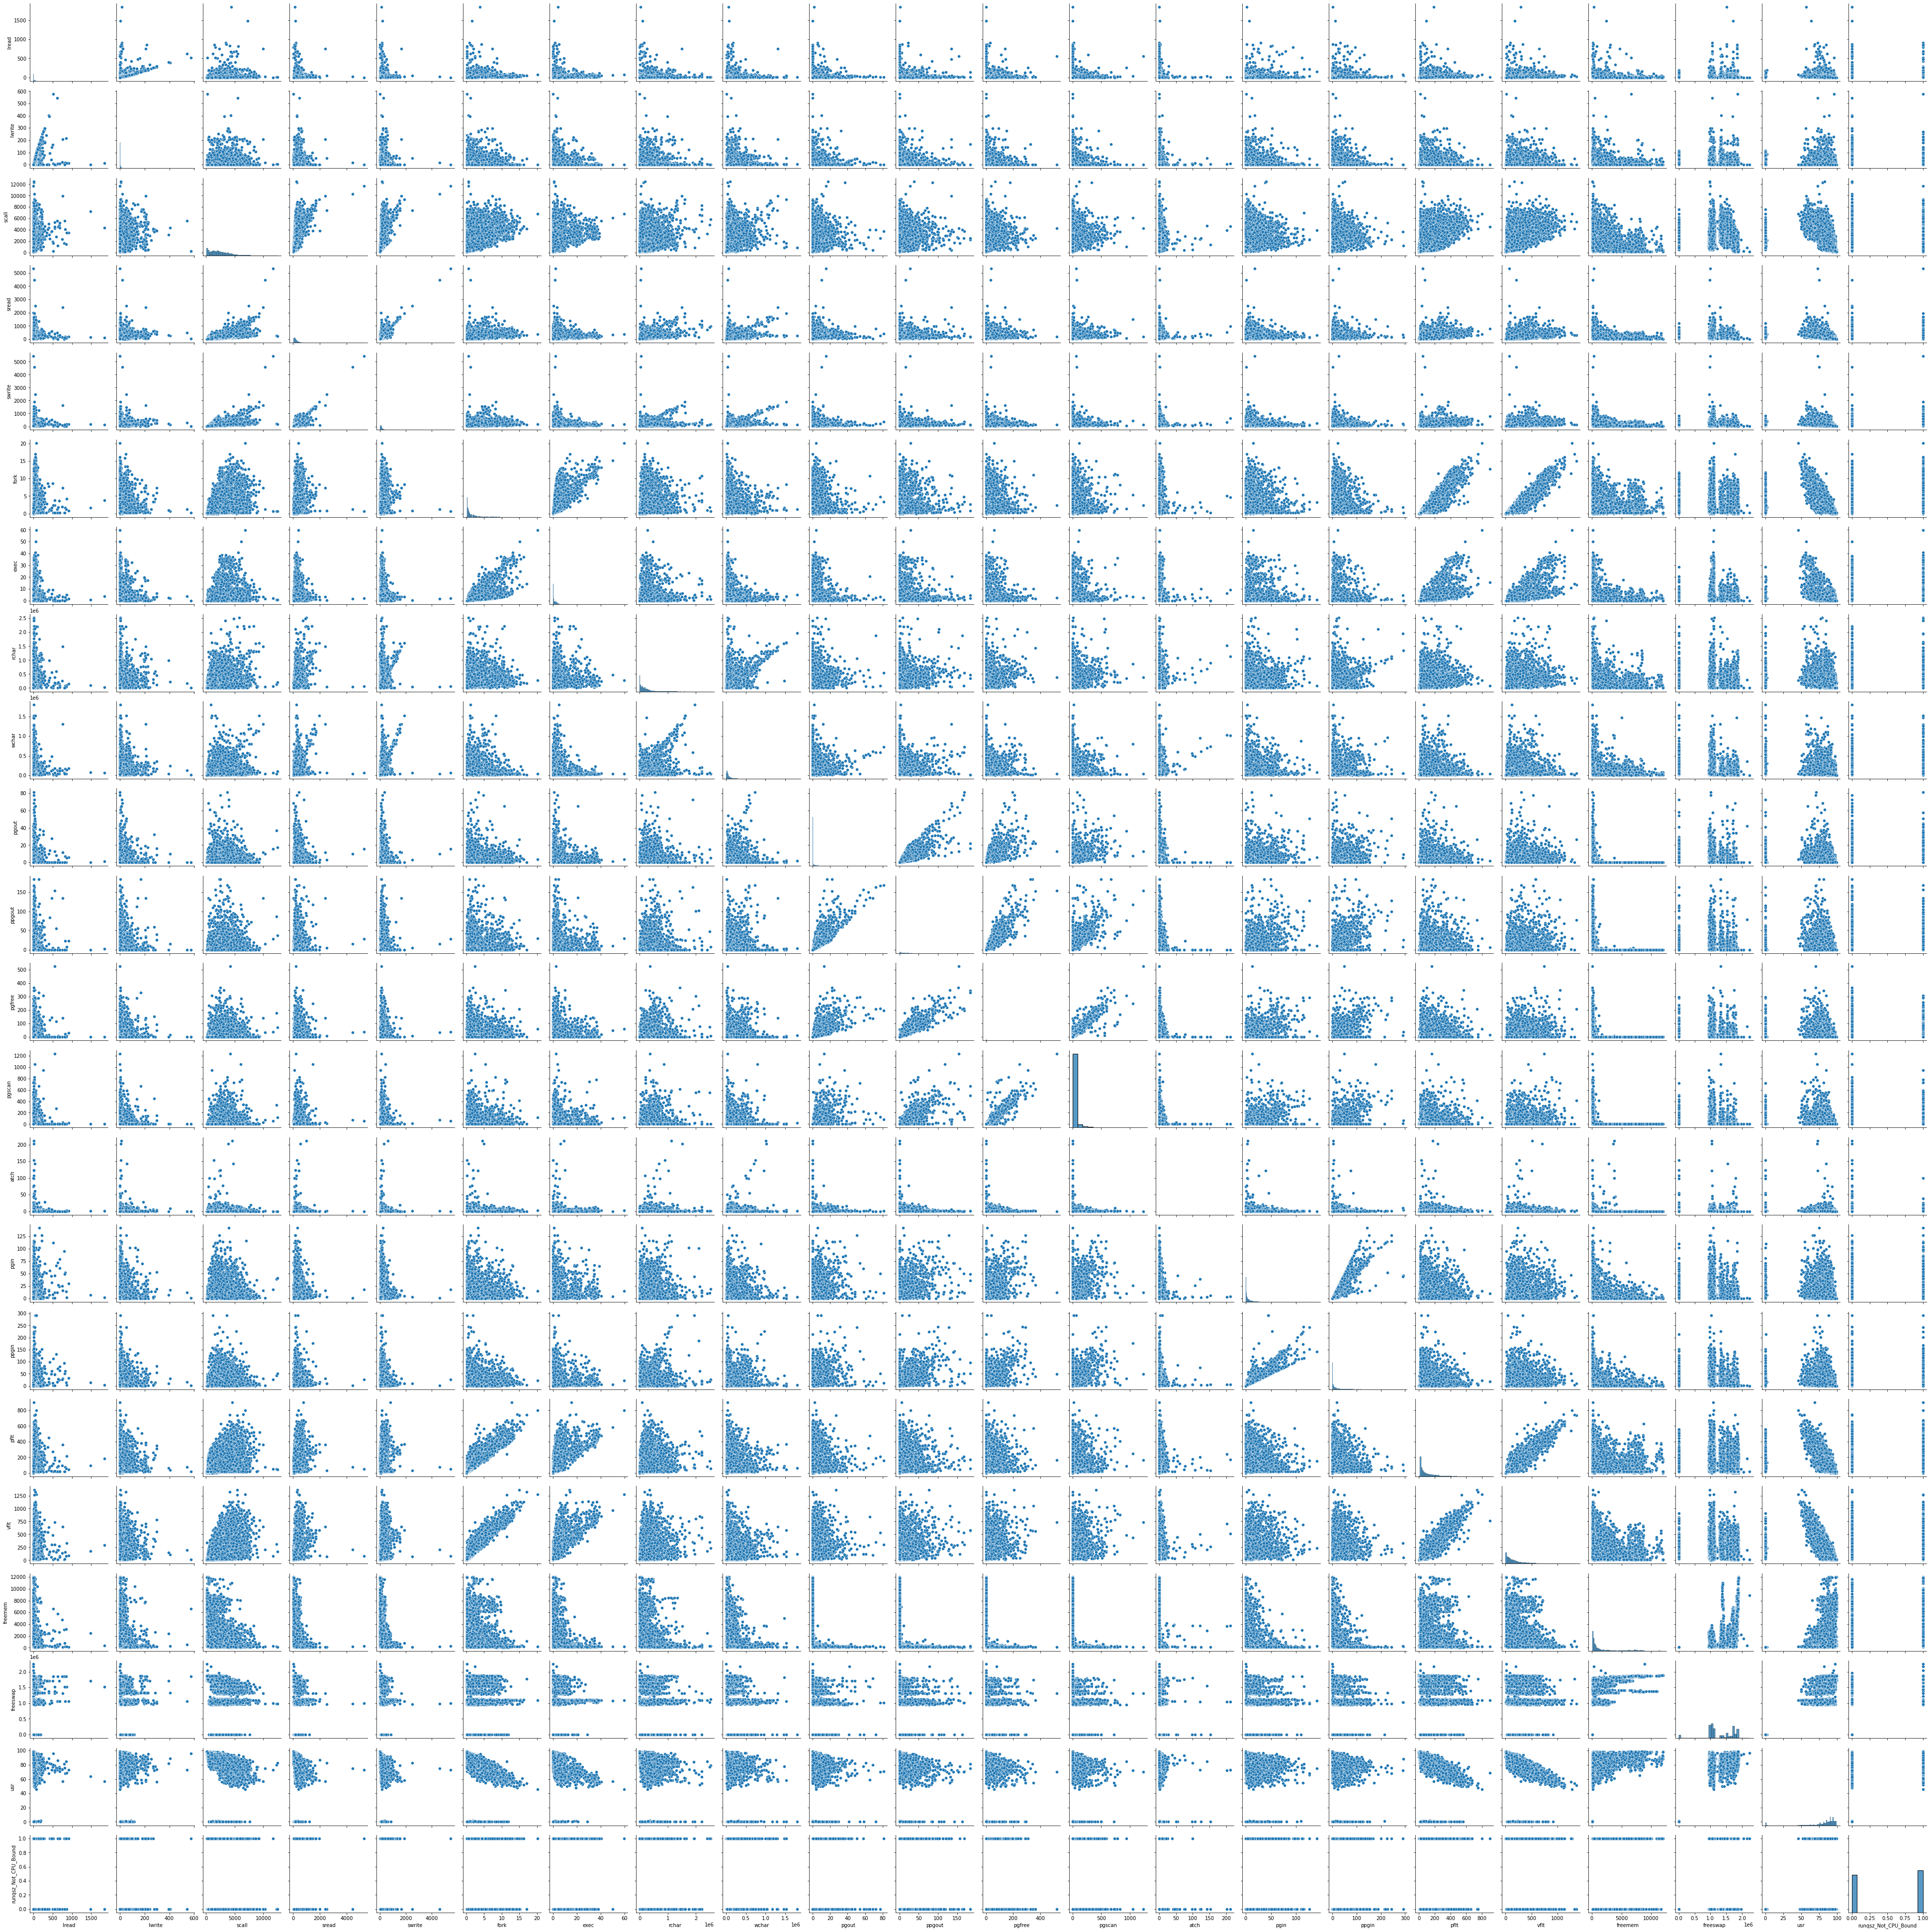

In [17]:
sns.pairplot(df)

In [18]:
corr=df.corr()

<AxesSubplot:>

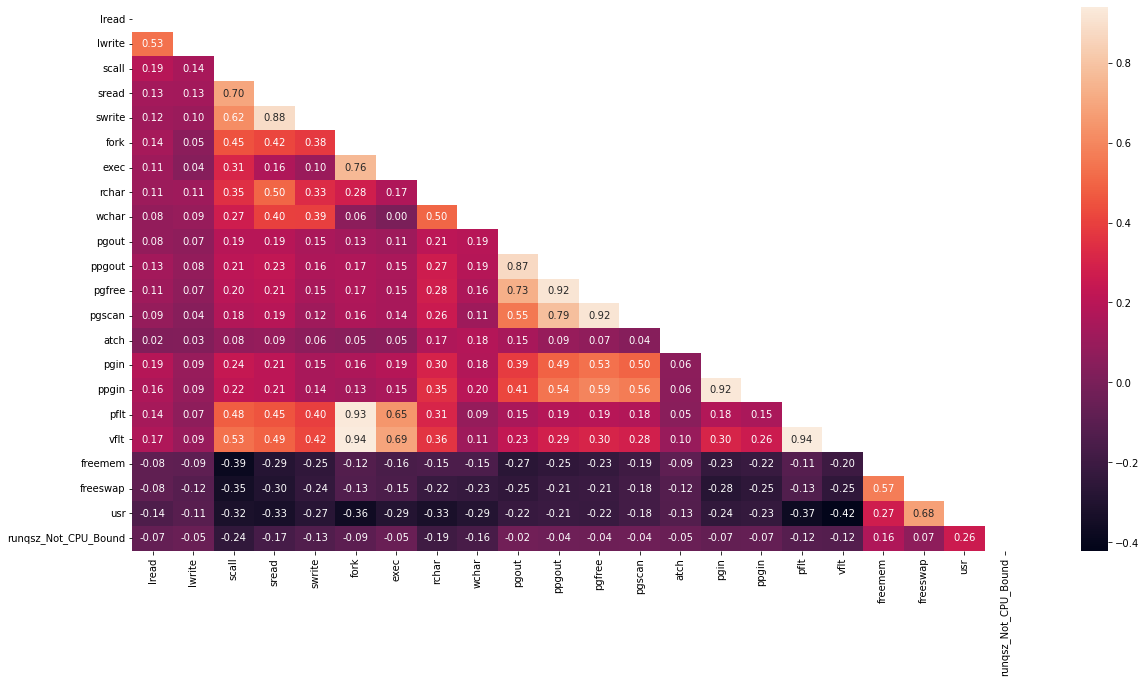

In [19]:
plt.figure(figsize = (20,10))
matrix = np.triu(corr)
sns.heatmap(df.corr(),annot=True,fmt='.2f', mask=matrix)

In [216]:
df.duplicated().sum()

0

In [217]:
for x in df.columns:
    y=(df[x]== 0.00).sum()
    print(x,':',y)

lread : 675
lwrite : 2684
scall : 0
sread : 0
swrite : 0
fork : 21
exec : 21
rchar : 0
wchar : 0
pgout : 4878
ppgout : 4878
pgfree : 4869
pgscan : 6448
atch : 4575
pgin : 1220
ppgin : 1220
pflt : 3
vflt : 0
freemem : 0
freeswap : 0
usr : 283
runqsz_Not_CPU_Bound : 3861


In [218]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [219]:
for column in df.columns:
    if column!= 'usr':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

In [220]:

X = df.drop('usr', axis=1)

y = df[['usr']]

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [221]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [222]:

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [223]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for lread is -0.07667325249942786
The coefficient for lwrite is 0.039048509054553114
The coefficient for scall is 0.0010625030295170832
The coefficient for sread is 0.0015810154763421969
The coefficient for swrite is -0.005586694336752351
The coefficient for fork is -0.8859128957991413
The coefficient for exec is -0.01665995700824994
The coefficient for rchar is -1.0307227116375021e-05
The coefficient for wchar is -5.973533135462081e-06
The coefficient for pgout is -0.8340754305278938
The coefficient for ppgout is 0.07857260123705803
The coefficient for pgfree is 0.06314415837933408
The coefficient for pgscan is 1.7763568394002505e-15
The coefficient for atch is 1.2801150364228149
The coefficient for pgin is 0.28481448619877936
The coefficient for ppgin is -0.16616132799519592
The coefficient for pflt is -0.056509816196380964
The coefficient for vflt is 0.01612323853168262
The coefficient for freemem is -0.0024003417177075872
The coefficient for freeswap is 3.2947656084

In [224]:

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 45.363682618488724


In [225]:

r2=regression_model.score(X_train, y_train)
r2

0.6201803014374798

In [226]:

r_2=regression_model.score(X_test, y_test)
r_2

0.6096995272247341

In [227]:

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

11.197722688713112

In [228]:

predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

11.916888626241166

In [229]:

adj_r2=1 - ((1-r2) * (len(X_train)-1)/(len(X_train)-(X_train.shape[1])-1))
adj_r2
adj_r_2=1 - ((1-r_2) * (len(X_test)-1)/(len(X_test)-(X_test.shape[1])-1))
adj_r_2

0.6056539645750398

Linear regression with Stats Model

In [230]:
import statsmodels.api as sm

In [231]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [232]:
model = sm.OLS(y_train,X_train).fit()
model

In [233]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     499.9
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:01   Log-Likelihood:                -23560.
No. Observations:                6144   AIC:                         4.716e+04
Df Residuals:                    6123   BIC:                         4.730e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   45.3637      0.770     58.944      0.000      43.855      46.872
lread                   -0.0767      0.022     -3.500      0.000      -0.120      -0.034
lwrite                   0.0390      0.032      1.218      0.223      -0.024       0.102
scall                    0.0011      0.000      6.909      0.000       0.001       0.001
sread                    0.0016      0.002      0.642      0.521      -0.003       0.006
swrite                  -0.0056      0.003     -1.598      0.110      -0.012       0.001
fork                    -0.8859      0.322     -2.751      0.006      -1.517      -0.255
exec                    -0.0167      0.126     -0.132      0.895      -0.263       0.230
rchar                -1.031e-05   1.19e-06     -8.652      0.000   -1.26e-05   -7.97e-06
wchar                -5.974e-06   2.54e-06     -2.354      0.019   -1.09e-05   -9.99e-07
pgout                   -0.8341      0.219     -3.806      0.000      -1.264      -0.404
ppgout                   0.0786      0.193      0.408      0.683      -0.299       0.456
pgfree                   0.0631      0.117      0.539      0.590      -0.167       0.293
pgscan               -1.158e-15   1.07e-15     -1.084      0.278   -3.25e-15    9.35e-16
atch                     1.2801      0.350      3.661      0.000       0.595       1.966
pgin                     0.2848      0.069      4.104      0.000       0.149       0.421
ppgin                   -0.1662      0.048     -3.455      0.001      -0.260      -0.072
pflt                    -0.0565      0.005    -11.668      0.000      -0.066      -0.047
vflt                     0.0161      0.003      4.681      0.000       0.009       0.023
freemem                 -0.0024      0.000    -19.283      0.000      -0.003      -0.002
freeswap              3.295e-05   4.64e-07     71.052      0.000     3.2e-05    3.39e-05
runqsz_Not_CPU_Bound     7.0212      0.308     22.781      0.000       6.417       7.625
==============================================================================
Omnibus:                     1484.728   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4229.119
Skew:                          -1.264   Prob(JB):                         0.00
Kurtosis:                       6.182   Cond. No.                     1.34e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.82e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [234]:

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  
df_pred["Fitted Values"] = model.fittedvalues.values  
df_pred["Residuals"] = model.resid.values  

df_pred.head()

Actual Values  Fitted Values  Residuals
0             94      83.061186  10.938814
1             96      69.569820  26.430180
2             77      69.488441   7.511559
3             93     108.850009 -15.850009
4             86      89.317662  -3.317662

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


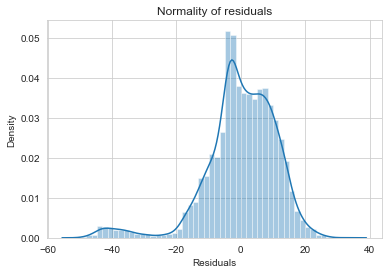

In [235]:
sns.distplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

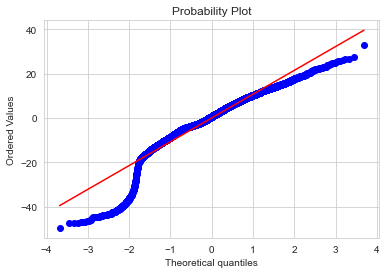

In [236]:
#QQ plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [237]:

df_tfm=pd.DataFrame()
for i in df.columns:
    a=np.cbrt(df[i])
    df_tfm[i]=a

In [238]:

X_tfm = df_tfm.drop(["usr"], axis=1)

y_tfm = df_tfm[["usr"]]
X_train_tfm, X_test_tfm, y_train_tfm, y_test_tfm = train_test_split(
    X_tfm, y_tfm, test_size=0.30, random_state=1
)

In [239]:
import statsmodels.api as sm
X_train_tfm=sm.add_constant(X_train_tfm)
model_tfm = sm.OLS(y_train_tfm,X_train_tfm).fit()
model_tfm

In [240]:
model_tfm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1875.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:08   Log-Likelihood:                -1135.4
No. Observations:                5734   AIC:                             2313.
Df Residuals:                    5713   BIC:                             2453.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4672      0.037    -12.482      0.000      -0.541      -0.394
lread                    0.0112      0.009      1.255      0.210      -0.006       0.029
lwrite                  -0.0015      0.007     -0.206      0.837      -0.015       0.012
scall                    0.0216      0.002      9.101      0.000       0.017       0.026
sread                    0.0222      0.008      2.928      0.003       0.007       0.037
swrite                  -0.0051      0.009     -0.594      0.553      -0.022       0.012
fork                    -0.3555      0.041     -8.658      0.000      -0.436      -0.275
exec                     0.0773      0.019      4.024      0.000       0.040       0.115
rchar                   -0.0025      0.000     -7.998      0.000      -0.003      -0.002
wchar                   -0.0001      0.000     -0.247      0.805      -0.001       0.001
pgout                   -0.0072      0.036     -0.200      0.842      -0.077       0.063
ppgout                  -0.0893      0.045     -1.976      0.048      -0.178      -0.001
pgfree                   0.0288      0.030      0.964      0.335      -0.030       0.088
pgscan               -7.497e-16   2.17e-16     -3.449      0.001   -1.18e-15   -3.24e-16
atch                     0.0495      0.012      4.077      0.000       0.026       0.073
pgin                     0.2163      0.026      8.275      0.000       0.165       0.268
ppgin                   -0.1304      0.023     -5.727      0.000      -0.175      -0.086
pflt                    -0.1028      0.010    -10.055      0.000      -0.123      -0.083
vflt                     0.1031      0.009     11.992      0.000       0.086       0.120
freemem                 -0.0332      0.002    -20.686      0.000      -0.036      -0.030
freeswap                 0.0447      0.000    171.421      0.000       0.044       0.045
runqsz_Not_CPU_Bound     0.2233      0.008     26.329      0.000       0.207       0.240
==============================================================================
Omnibus:                        2.637   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.531
Skew:                          -0.014   Prob(JB):                        0.282
Kurtosis:                       2.901   Cond. No.                     8.45e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [241]:

df_pred_tfm = pd.DataFrame()

df_pred_tfm["Actual Values"] = y_train_tfm.values.flatten()  
df_pred_tfm["Fitted Values"] = model_tfm.fittedvalues.values  
df_pred_tfm["Residuals"] = model_tfm.resid.values 
df_pred_tfm.head()

Actual Values  Fitted Values  Residuals
0       4.497941       4.424236   0.073705
1       4.546836       4.159320   0.387516
2       0.000000       0.575132  -0.575132
3       4.362071       3.905201   0.456870
4       4.546836       4.653367  -0.106531

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


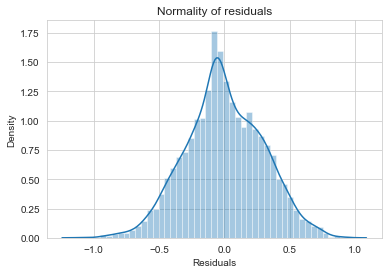

In [242]:
sns.distplot(df_pred_tfm["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

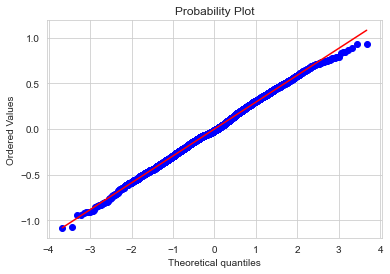

In [243]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred_tfm["Residuals"], dist="norm", plot=pylab)
plt.show()


In [244]:

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred_tfm["Residuals"], X_train_tfm)
lzip(name, test)

[('F statistic', 1.0521548128250462), ('p-value', 0.08756248478244723)]

In [245]:

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.090097084622493), ('p-value', 0.008610737411134444)]

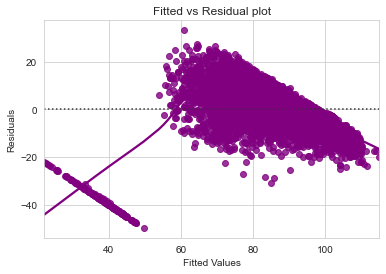

In [246]:

sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

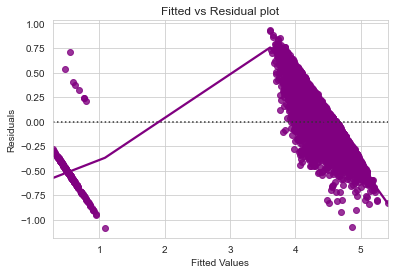

In [247]:

sns.set_style("whitegrid")
sns.residplot(
    data=df_pred_tfm, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    92.006069
lread                     5.405953
lwrite                    3.870681
scall                     4.340623
sread                     8.788795
swrite                    7.386769
fork                     16.886482
exec                      4.601272
rchar                     2.680710
wchar                     1.802433
pgout                    46.386694
ppgout                  108.959624
pgfree                   55.153876
pgscan                         NaN
atch                      2.179514
pgin                     35.776926
ppgin                    35.368412
pflt                     14.939260
vflt                     15.147903
freemem                   2.787179
freeswap                  1.507008
runqsz_Not_CPU_Bound      1.176802
dtype: float64



C:\Users\anamk\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [249]:
X_train1 = X_train_tfm.drop(["pgscan"], axis=1)
olsmod_1 = sm.OLS(y_train_tfm, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.868 
Adjusted R-squared: 0.867


In [250]:
X_train_tfm = X_train_tfm.drop(["pgscan"], axis=1)
olsmod_2 = sm.OLS(y_train_tfm, X_train_tfm)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1875.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:33   Log-Likelihood:                -1135.4
No. Observations:                5734   AIC:                             2313.
Df Residuals:                    5713   BIC:                             2453.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4672 

In [251]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    92.006069
lread                     5.405953
lwrite                    3.870681
scall                     4.340623
sread                     8.788795
swrite                    7.386769
fork                     16.886482
exec                      4.601272
rchar                     2.680710
wchar                     1.802433
pgout                    46.386694
ppgout                  108.959624
pgfree                   55.153876
atch                      2.179514
pgin                     35.776926
ppgin                    35.368412
pflt                     14.939260
vflt                     15.147903
freemem                   2.787179
freeswap                  1.507008
runqsz_Not_CPU_Bound      1.176802
dtype: float64



In [252]:
X_train_2 = X_train_tfm.drop(["ppgout"], axis=1)
olsmod_3= sm.OLS(y_train_tfm, X_train_2)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.868 
Adjusted R-squared: 0.867


In [253]:
X_train_tfm=X_train_tfm.drop(["ppgout"],axis=1)


In [254]:
olsmod_4= sm.OLS(y_train_tfm, X_train_tfm)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1972.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:35:33   Log-Likelihood:                -1137.3
No. Observations:                5734   AIC:                             2315.
Df Residuals:                    5714   BIC:                             2448.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4594 

In [255]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.988393
lread                    5.405027
lwrite                   3.870360
scall                    4.339959
sread                    8.787102
swrite                   7.385746
fork                    16.875923
exec                     4.600459
rchar                    2.680618
wchar                    1.797805
pgout                   23.419078
pgfree                  22.691862
atch                     2.179509
pgin                    35.731665
ppgin                   35.295431
pflt                    14.938765
vflt                    15.144445
freemem                  2.767726
freeswap                 1.506496
runqsz_Not_CPU_Bound     1.176360
dtype: float64



In [256]:
X_train_3 = X_train_tfm.drop(["pgin"], axis=1)
olsmod_5= sm.OLS(y_train_tfm, X_train_3)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.866 
Adjusted R-squared: 0.866


without pgin R square value is reducing by 0.002, it might be significant variable, so will not remove from the data

In [257]:
X_train_4 = X_train_tfm.drop(["ppgin"], axis=1)
olsmod_6= sm.OLS(y_train_tfm, X_train_4)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.867 
Adjusted R-squared: 0.867


In [258]:
X_train_tfm=X_train_tfm.drop(["ppgin"],axis=1)


In [259]:
olsmod_6= sm.OLS(y_train_tfm, X_train_tfm)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2068.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:38:39   Log-Likelihood:                -1154.3
No. Observations:                5734   AIC:                             2347.
Df Residuals:                    5715   BIC:                             2473.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4507 

In [260]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.840272
lread                    5.366940
lwrite                   3.858827
scall                    4.335468
sread                    8.782908
swrite                   7.385184
fork                    16.860477
exec                     4.600243
rchar                    2.622642
wchar                    1.797450
pgout                   23.351963
pgfree                  22.537475
atch                     2.178717
pgin                     2.076315
pflt                    14.932956
vflt                    15.132834
freemem                  2.762877
freeswap                 1.506041
runqsz_Not_CPU_Bound     1.176026
dtype: float64



In [261]:
X_train_5 = X_train_tfm.drop(["pgout"], axis=1)
olsmod_7= sm.OLS(y_train_tfm, X_train_3)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.866 
Adjusted R-squared: 0.866


In [262]:
X_train_6 = X_train_tfm.drop(["pgfree"], axis=1)
olsmod_8= sm.OLS(y_train_tfm, X_train_6)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.867 
Adjusted R-squared: 0.866


No change in the R square value without pgfree, so we need to remove it

In [263]:
X_train_tfm=X_train_tfm.drop(["pgfree"],axis=1)
olsmod_9= sm.OLS(y_train_tfm, X_train_tfm)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2190.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:38:42   Log-Likelihood:                -1155.2
No. Observations:                5734   AIC:                             2346.
Df Residuals:                    5716   BIC:                             2466.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4498 

In [264]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.810076
lread                    5.355764
lwrite                   3.848450
scall                    4.327194
sread                    8.781862
swrite                   7.384470
fork                    16.850634
exec                     4.598412
rchar                    2.618059
wchar                    1.797445
pgout                    2.701316
atch                     2.176017
pgin                     2.069703
pflt                    14.918368
vflt                    15.078705
freemem                  2.750559
freeswap                 1.501754
runqsz_Not_CPU_Bound     1.175587
dtype: float64



In [265]:
X_train_7 = X_train_tfm.drop(["fork"], axis=1)
olsmod_10= sm.OLS(y_train_tfm, X_train_7)
olsres_10= olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.865 
Adjusted R-squared: 0.865


As the fork reducing 0.002 value of R square, so might be important. We will not remove it

In [266]:
X_train_8 = X_train_tfm.drop(["vflt"], axis=1)
olsmod_11= sm.OLS(y_train_tfm, X_train_8)
olsres_11= olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.864 
Adjusted R-squared: 0.863


Removing vflt effecting the R square value by 0.004 reduced. so no need to remove

In [267]:
X_train_9 = X_train_tfm.drop(["pflt"], axis=1)
olsmod_12= sm.OLS(y_train_tfm, X_train_9)
olsres_12= olsmod_12.fit()
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)

R-squared: 0.864 
Adjusted R-squared: 0.864


In [268]:
X_train_10 = X_train_tfm.drop(["sread"], axis=1)
olsmod_13= sm.OLS(y_train_tfm, X_train_10)
olsres_13= olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.867 
Adjusted R-squared: 0.866


In [269]:
X_train_tfm=X_train_tfm.drop(["sread"],axis=1)
olsmod_14= sm.OLS(y_train_tfm, X_train_tfm)
olsres_14= olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2322.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:38:47   Log-Likelihood:                -1160.0
No. Observations:                5734   AIC:                             2354.
Df Residuals:                    5717   BIC:                             2467.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4442 

In [270]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.600063
lread                    5.349358
lwrite                   3.841657
scall                    3.883814
swrite                   4.369311
fork                    16.834871
exec                     4.595042
rchar                    2.031909
wchar                    1.779942
pgout                    2.700847
atch                     2.174413
pgin                     2.066971
pflt                    14.915421
vflt                    14.984715
freemem                  2.742577
freeswap                 1.499386
runqsz_Not_CPU_Bound     1.175068
dtype: float64



In [199]:
X_train_11 = X_train_tfm.drop(["lread"], axis=1)
olsmod_15= sm.OLS(y_train_tfm, X_train_11)
olsres_15= olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

KeyError: "['lread'] not found in axis"

In [120]:
X_train_tfm=X_train_tfm.drop(["lread"],axis=1)


KeyError: "['lread'] not found in axis"

In [271]:
olsmod_16= sm.OLS(y_train_tfm, X_train_tfm)
olsres_16= olsmod_16.fit()
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2322.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:39:06   Log-Likelihood:                -1160.0
No. Observations:                5734   AIC:                             2354.
Df Residuals:                    5717   BIC:                             2467.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4442 

In [272]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_tfm.values, i) for i in range(X_train_tfm.shape[1])],
    index=X_train_tfm.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   90.600063
lread                    5.349358
lwrite                   3.841657
scall                    3.883814
swrite                   4.369311
fork                    16.834871
exec                     4.595042
rchar                    2.031909
wchar                    1.779942
pgout                    2.700847
atch                     2.174413
pgin                     2.066971
pflt                    14.915421
vflt                    14.984715
freemem                  2.742577
freeswap                 1.499386
runqsz_Not_CPU_Bound     1.175068
dtype: float64



In [123]:
X_train_12 = X_train_tfm.drop(["wchar"], axis=1)
olsmod_17= sm.OLS(y_train_tfm, X_train_12)
olsres_17= olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

KeyError: "['wchar'] not found in axis"

In [124]:
X_train_tfm=X_train_tfm.drop(["wchar"],axis=1)


KeyError: "['wchar'] not found in axis"

In [273]:
olsmod_18= sm.OLS(y_train_tfm, X_train_tfm)
olsres_18= olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2322.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        00:39:19   Log-Likelihood:                -1160.0
No. Observations:                5734   AIC:                             2354.
Df Residuals:                    5717   BIC:                             2467.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4442 

In [274]:
# let's check the model parameters
olsres_18.params

const                  -0.444237
lread                   0.005122
lwrite                  0.002347
scall                   0.024438
swrite                  0.011056
fork                   -0.348761
exec                    0.073886
rchar                  -0.002302
wchar                  -0.000234
pgout                  -0.081649
atch                    0.050490
pgin                    0.069331
pflt                   -0.104086
vflt                    0.105683
freemem                -0.033958
freeswap                0.044573
runqsz_Not_CPU_Bound    0.221827
dtype: float64

In [275]:

Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train_tfm.columns)):
    if i == 0:
        print(olsres_18.params[i], "+", end=" ")
    elif i != len(X_train_tfm.columns) - 1:
        print(
            olsres_18.params[i],
            "* (",
            X_train_tfm.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_11.params[i], "* (", X_train_tfm.columns[i], ")")

usr = -0.4442367028637364 + 0.0051223317385346995 * ( lread ) +  0.002346755351111132 * ( lwrite ) +  0.024437833711042387 * ( scall ) +  0.011055726286712253 * ( swrite ) +  -0.34876096803539636 * ( fork ) +  0.07388586328038932 * ( exec ) +  -0.0023019504450744275 * ( rchar ) +  -0.0002335682897087973 * ( wchar ) +  -0.08164852998132482 * ( pgout ) +  0.05048976359805957 * ( atch ) +  0.06933128103292881 * ( pgin ) +  -0.10408590255358066 * ( pflt ) +  0.10568294231621825 * ( vflt ) +  -0.033957533598266816 * ( freemem ) +  0.0445729921549165 * ( freeswap ) +  0.22365023190802324 * ( runqsz_Not_CPU_Bound )


In [276]:
X_train_tfm.columns

Index(['const', 'lread', 'lwrite', 'scall', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'atch', 'pgin', 'pflt', 'vflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [277]:
X_test_tfm.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [278]:
X_test_tfm=sm.add_constant(X_test_tfm)

In [279]:
X_test_f=X_test_tfm.drop(
    ["lread", "wchar", "ppgout","pgfree","pgscan","ppgin"], axis=1)

In [280]:
X_test_f.columns

Index(['const', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'pgout', 'atch', 'pgin', 'pflt', 'vflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [281]:

y_pred = olsres_18.predict(X_test_f)

ValueError: shapes (2458,16) and (17,) not aligned: 16 (dim 1) != 17 (dim 0)

In [282]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_train_tfm, df_pred_tfm["Fitted Values"]))
rmse1

0.2949558701664114

In [283]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test_tfm, y_pred))
rmse2

0.3052770398835441

In [284]:

mae1 = mean_absolute_error(y_train_tfm, df_pred_tfm["Fitted Values"])
mae1

0.23491124699140656

In [285]:

mae2 = mean_absolute_error(y_test_tfm, y_pred)
mae2

0.2428562679250243

# Problem 2: Logistic Regression, LDA and CART

You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [144]:
d1=pd.read_excel("C:/Users/anamk/Downloads/Contraceptive_method_dataset (1).xlsx")

In [145]:
d1.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [146]:
d1.tail()

Wife_age Wife_ education Husband_education  No_of_children_born  \
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [147]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [148]:
d1.describe(include='all')

Wife_age Wife_ education Husband_education  No_of_children_born  \
count   1402.000000            1473              1473          1452.000000   
unique          NaN               4                 4                  NaN   
top             NaN        Tertiary          Tertiary                  NaN   
freq            NaN             577               899                  NaN   
mean      32.606277             NaN               NaN             3.254132   
std        8.274927             NaN               NaN             2.365212   
min       16.000000             NaN               NaN             0.000000   
25%       26.000000             NaN               NaN             1.000000   
50%       32.000000             NaN               NaN             3.000000   
75%       39.000000             NaN               NaN             4.000000   
max       49.000000             NaN               NaN            16.000000   

       Wife_religion Wife_Working  Husband_Occupation  \
count           1473         1473         1473.000000   
unique             2            2                 NaN   
top      Scientology           No                 NaN   
freq            1253         1104                 NaN   
mean             NaN          NaN            2.137814   
std              NaN          NaN            0.864857   
min              NaN          NaN            1.000000   
25%              NaN          NaN            1.000000   
50%              NaN          NaN            2.000000   
75%              NaN          NaN            3.000000   
max              NaN          NaN            4.000000   

       Standard_of_living_index Media_exposure  Contraceptive_method_used  
count                      1473            1473                      1473  
unique                        4               2                         2  
top                   Very High         Exposed                       Yes  
freq                        684            1364                       844  
mean                        NaN             NaN                       NaN  
std                         NaN             NaN                       NaN  
min                         NaN             NaN                       NaN  
25%                         NaN             NaN                       NaN  
50%                         NaN             NaN                       NaN  
75%                         NaN             NaN                       NaN  
max                         NaN             NaN                       NaN

In [149]:
d1.groupby(["Contraceptive_method_used"]).count()

Wife_age  Wife_ education  Husband_education  \
Contraceptive_method_used                                                 
No                              629              629                629   
Yes                             773              844                844   

                           No_of_children_born  Wife_religion  Wife_Working  \
Contraceptive_method_used                                                     
No                                         629            629           629   
Yes                                        823            844           844   

                           Husband_Occupation  Standard_of_living_index  \
Contraceptive_method_used                                                 
No                                        629                       629   
Yes                                       844                       844   

                           Media_exposure   
Contraceptive_method_used                   
No                                     629  
Yes                                    844

In [150]:
d1.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [151]:
d1.duplicated().sum()

80

In [152]:
d1.drop_duplicates(keep=False,inplace=True)

In [153]:
d1.duplicated().sum()

0

In [154]:
for column in d1.columns:
    if d1[column].dtype != 'object':
        mean = d1[column].mean()
        d1[column] = d1[column].fillna(mean)    
        
d1.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [155]:
for feature in d1.columns: 
    if d1[feature].dtype == 'object':
        d1[feature] = pd.Categorical(d1[feature]).codes #Encoding 

In [159]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1322 non-null   float64
 1   Wife_ education            1322 non-null   int8   
 2   Husband_education          1322 non-null   int8   
 3   No_of_children_born        1322 non-null   float64
 4   Wife_religion              1322 non-null   int8   
 5   Wife_Working               1322 non-null   int8   
 6   Husband_Occupation         1322 non-null   int64  
 7   Standard_of_living_index   1322 non-null   int8   
 8   Media_exposure             1322 non-null   int8   
 9   Contraceptive_method_used  1322 non-null   int8   
dtypes: float64(2), int64(1), int8(7)
memory usage: 50.3 KB


In [160]:
d1.groupby(["Contraceptive_method_used"]).count()

Wife_age  Wife_ education  Husband_education  \
Contraceptive_method_used                                                 
0                               600              600                600   
1                               722              722                722   

                           No_of_children_born  Wife_religion  Wife_Working  \
Contraceptive_method_used                                                     
0                                          600            600           600   
1                                          722            722           722   

                           Husband_Occupation  Standard_of_living_index  \
Contraceptive_method_used                                                 
0                                         600                       600   
1                                         722                       722   

                           Media_exposure   
Contraceptive_method_used                   
0                                      600  
1                                      722

Univariate Analysis

In [161]:
def univariateAnalysis_numeric(column,nbins):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    sns.distplot(d1[column], kde=True, color='g');
    plt.subplot(2,2,2)
    ax = sns.boxplot(x=d1[column])
    plt.show()

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


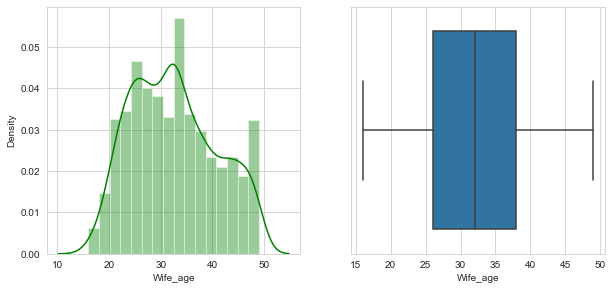

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


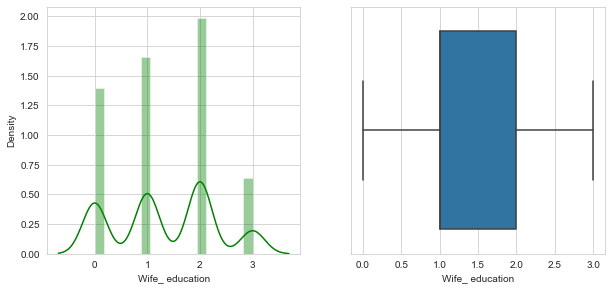

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


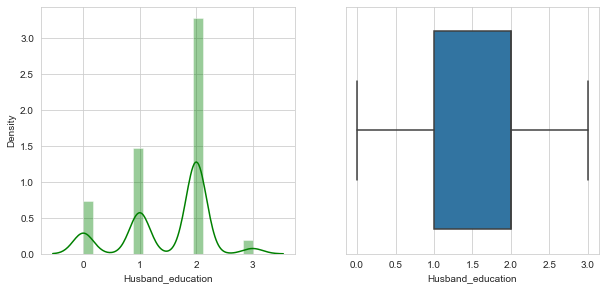

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


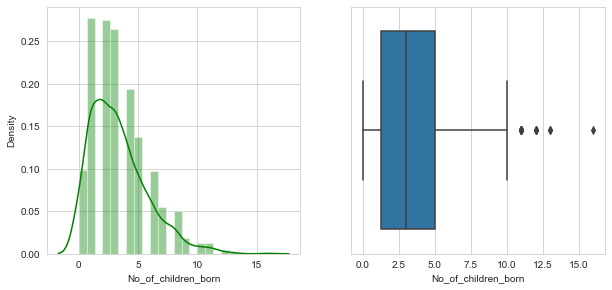

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


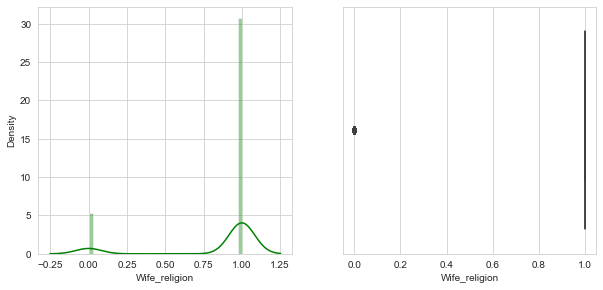

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


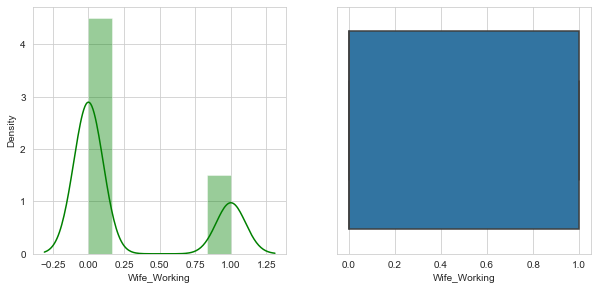

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


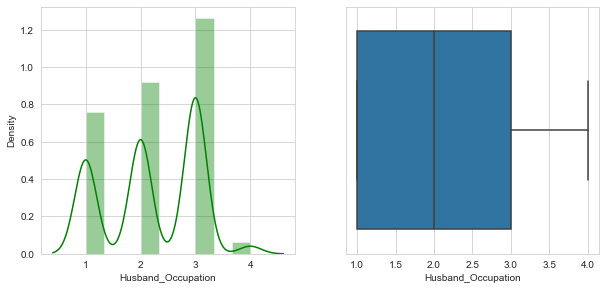

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


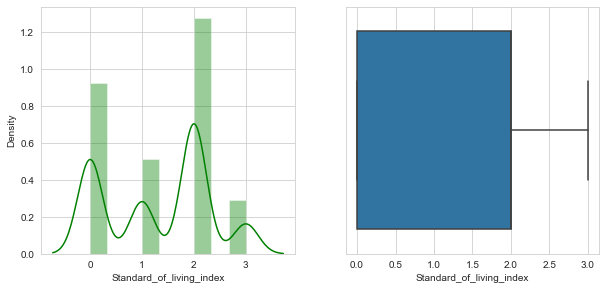

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


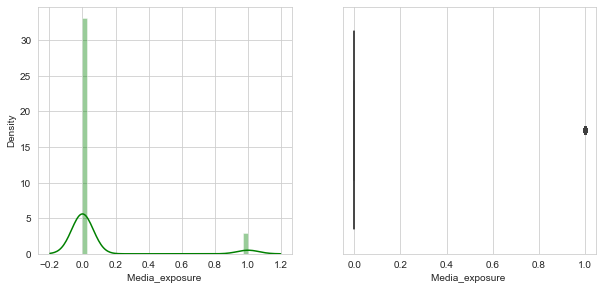

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


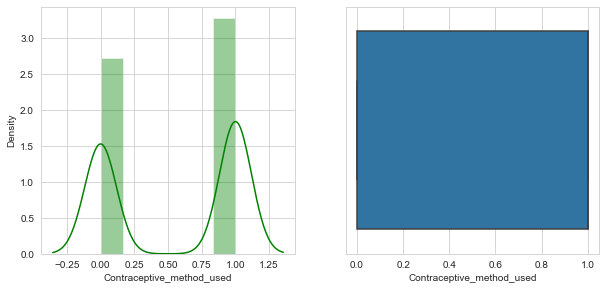

In [162]:
for i in d1.columns:
        univariateAnalysis_numeric(i,3)

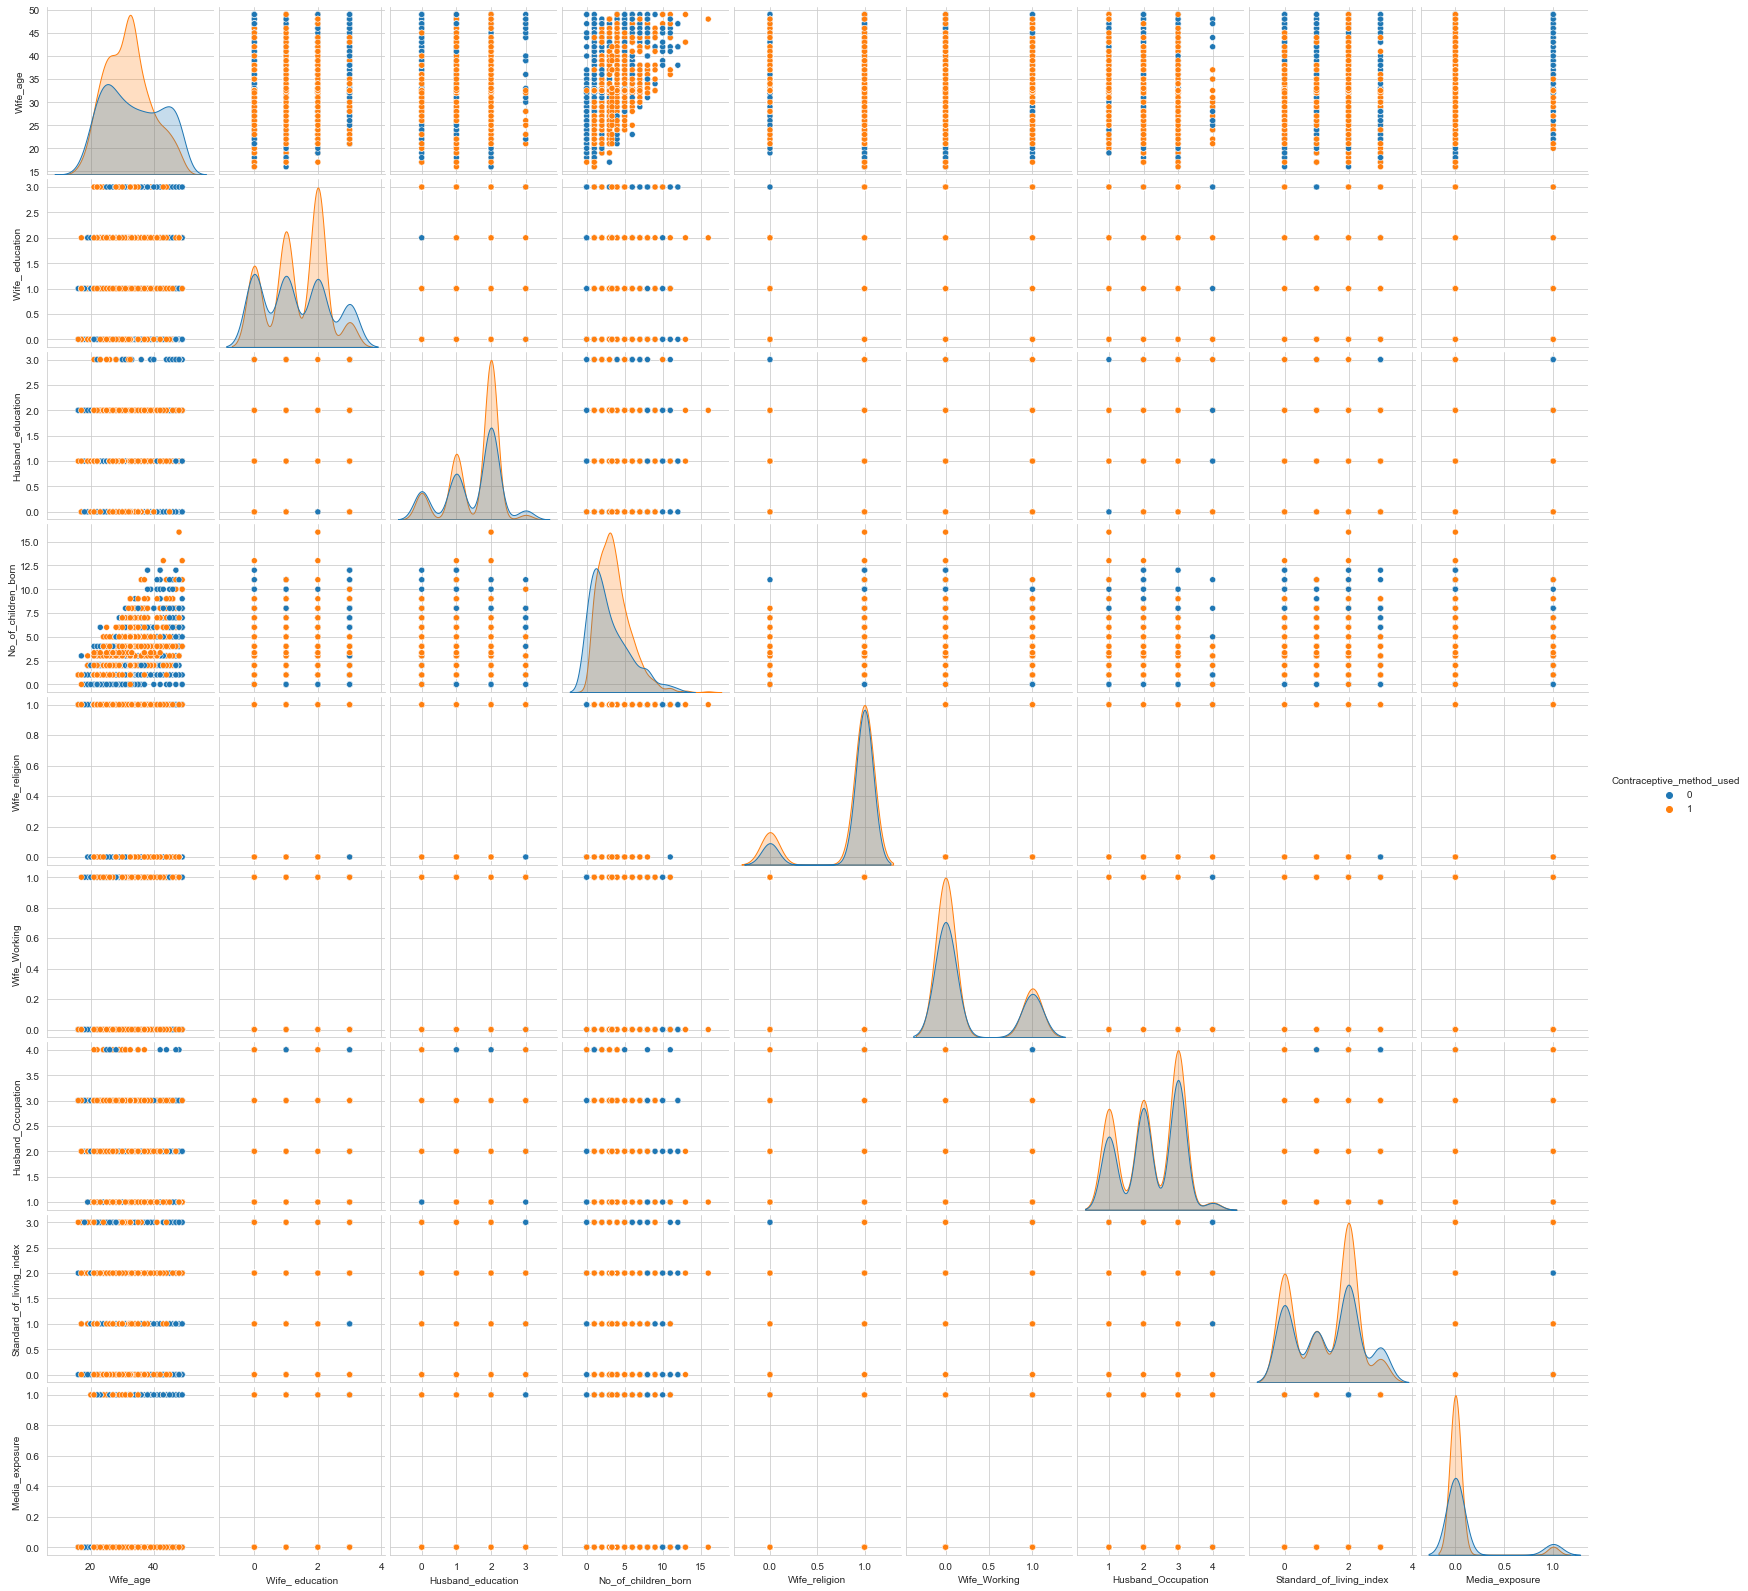

In [163]:
sns.pairplot(d1 , hue='Contraceptive_method_used' , diag_kind = 'kde');

### Multivariate analysis

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


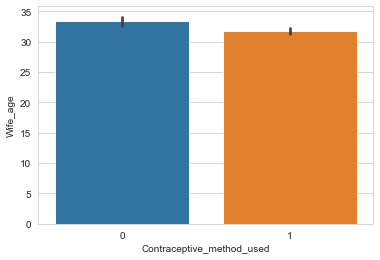

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


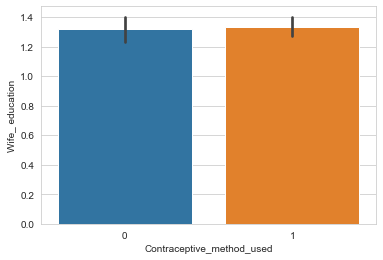

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


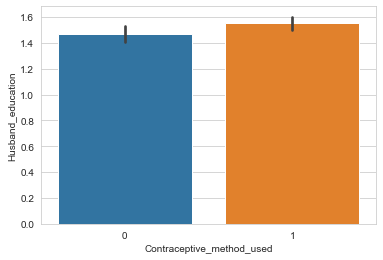

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


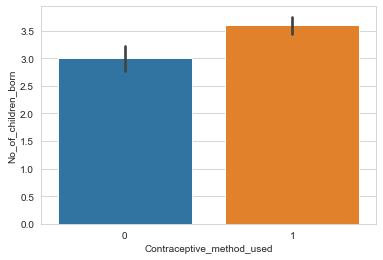

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


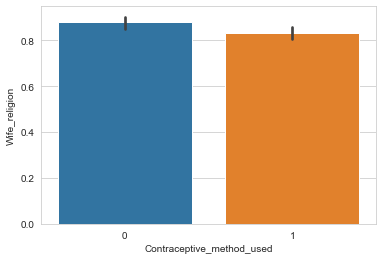

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


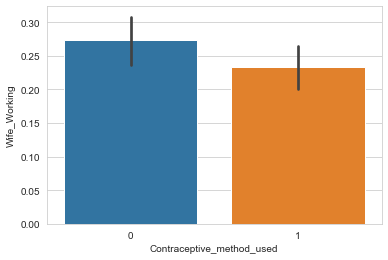

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


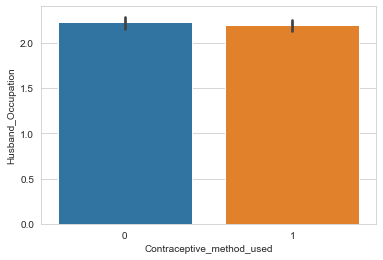

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


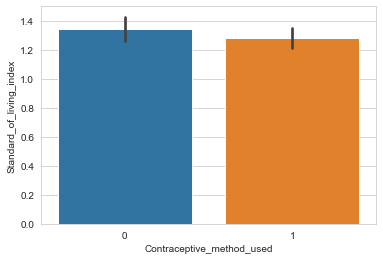

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


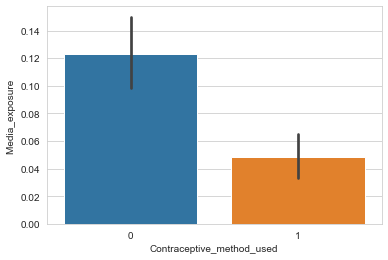

C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


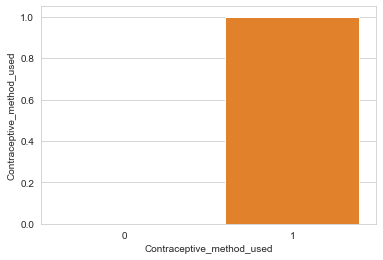

In [164]:
for x in d1.columns:
    sns.barplot(d1.Contraceptive_method_used, d1[x])
    plt.show()

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

LOGISTIC REGRESSION

In [165]:
X = d1.drop('Contraceptive_method_used', axis=1)
y = d1[['Contraceptive_method_used']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [166]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)
y_predict = model_logit.predict(X_test)
model_score = model_logit.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict));

0.6146095717884131
[[ 77 110]
 [ 43 167]]
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       187
           1       0.60      0.80      0.69       210

    accuracy                           0.61       397
   macro avg       0.62      0.60      0.59       397
weighted avg       0.62      0.61      0.60       397



C:\Users\anamk\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anamk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


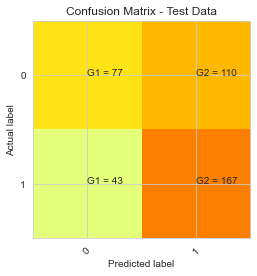

In [167]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = [0,1]
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

LDA

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [169]:
clf_lda = LinearDiscriminantAnalysis()
model_lda=clf_lda.fit(X_train,y_train)

C:\Users\anamk\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
clf_lda.intercept_ 

array([2.54066362])

In [171]:
clf_lda.coef_

array([[-0.08388022,  0.19178057,  0.14191465,  0.28348428, -0.7540312 ,
        -0.00119277, -0.07464787, -0.06710266, -1.13568256]])

In [172]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model_lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model_lda.predict(X_test)

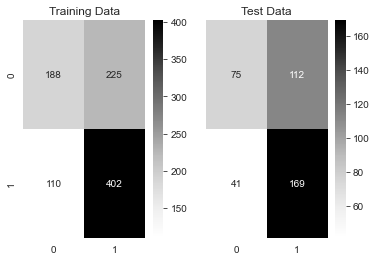

In [173]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [175]:
print('Classification Report of the training data_LDA:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data_LDa:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')


Classification Report of the training data_LDA:

               precision    recall  f1-score   support

           0       0.63      0.46      0.53       413
           1       0.64      0.79      0.71       512

    accuracy                           0.64       925
   macro avg       0.64      0.62      0.62       925
weighted avg       0.64      0.64      0.63       925
 

Classification Report of the test data_LDa:

               precision    recall  f1-score   support

           0       0.65      0.40      0.50       187
           1       0.60      0.80      0.69       210

    accuracy                           0.61       397
   macro avg       0.62      0.60      0.59       397
weighted avg       0.62      0.61      0.60       397
 



CART

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
dt_model_CART= DecisionTreeClassifier(criterion = 'gini' )

In [178]:
dt_model_CART.fit(X_train, y_train)

DecisionTreeClassifier()

In [182]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('D:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model_CART, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [183]:
print (pd.DataFrame(dt_model_CART.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Wife_age                  0.296038
Wife_ education           0.100364
Husband_education         0.068022
No_of_children_born       0.267376
Wife_religion             0.028187
Wife_Working              0.036898
Husband_Occupation        0.088176
Standard_of_living_index  0.097980
Media_exposure            0.016958


In [184]:
y_predict = dt_model_CART.predict(X_test)

In [185]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 20,min_samples_leaf=26,min_samples_split=133)
reg_dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=26, min_samples_split=133)

In [192]:
credit_tree_regularized = open('D:\credit_tree_regularized_20new.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model_CART.feature_importances_, columns = ["Imp"], index = X_train.columns))


                               Imp
Wife_age                  0.296038
Wife_ education           0.100364
Husband_education         0.068022
No_of_children_born       0.267376
Wife_religion             0.028187
Wife_Working              0.036898
Husband_Occupation        0.088176
Standard_of_living_index  0.097980
Media_exposure            0.016958


2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

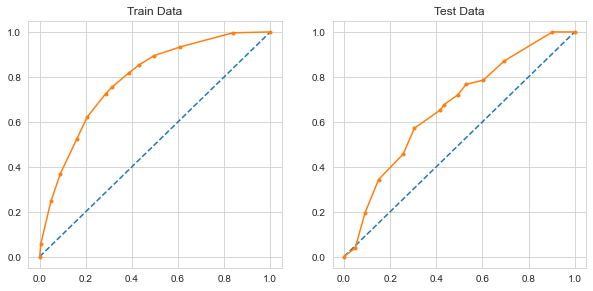

In [193]:
#ROC_CART-train

probs_cart = reg_dt_model.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
plt.figure(figsize=(10,10))
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs_cart)
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')


#ROC_CART-test
probs_cart_test = reg_dt_model.predict_proba(X_test)
probs_cart_test = probs_cart_test[:, 1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs_cart_test)
plt.subplot(222)
plt.title('Test Data')

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



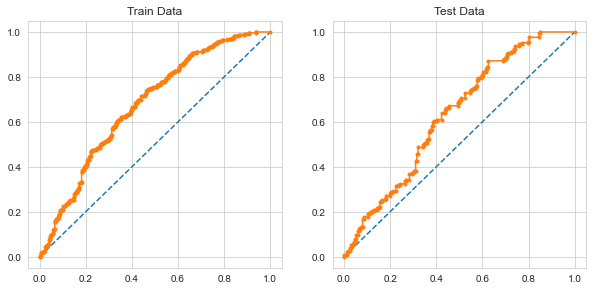

In [194]:
#ROC_LDA
#  calculate roc curve
pred_prob_train = model_lda.predict_proba(X_train)
pred_prob_train[:,1]
plt.figure(figsize=(10,10))
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


pred_prob_test = model_lda.predict_proba(X_test)
pred_prob_test[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.subplot(222)
plt.title('Test Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

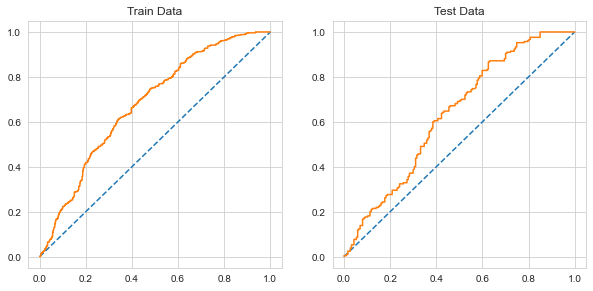

In [195]:
#ROC_Logistic
probs_train = model_logit.predict_proba(X_train)
probs_train = probs_train[:, 1]
plt.figure(figsize=(10,10))
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.subplot(221)
plt.title('Train Data')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

probs_test = model_logit.predict_proba(X_test)
probs_test = probs_test[:, 1]
plt.subplot(222)
plt.title('Test Data')
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [196]:
#AUC CART

probs_train = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs_train)
print('AUC CART TRAIN DATA: %.3f' % auc)

probs_test = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs_test)
print('AUC CART TEST DATA: %.3f' % auc)

AUC CART TRAIN DATA: 0.788
AUC CART TEST DATA: 0.662


In [197]:
#AUC LDA
pred_prob_train = model_lda.predict_proba(X_train)
pred_prob_train[:,1]
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC CART TRAIN DATA: %.3f' % auc)

pred_prob_test = model_lda.predict_proba(X_test)
pred_prob_test[:,1]
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC CART TEST DATA: %.3f' % auc)



AUC CART TRAIN DATA: 0.678
AUC CART TEST DATA: 0.632


In [198]:
#AUC LOGISTIC
probs_logit_train = model_logit.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_logit_train = probs_logit_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_logit_train)
print('AUC LOGISTIC TRAIN DATA: %.3f' % auc)

probs_logit_test = model_logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_logit_test = probs_logit_test[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs_logit_test)
print('AUC LOGISTIC TEST DATA: %.3f' % auc)

AUC LOGISTIC TRAIN DATA: 0.678
AUC LOGISTIC TEST DATA: 0.632
